# Exploratory Data Analysis - Bank Fraud Detection

This notebook explores the bank fraud detection dataset to understand:
- Data structure and quality
- Class distribution (fraud vs non-fraud)
- Feature distributions and relationships
- Patterns in fraudulent transactions
- Feature engineering opportunities


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
sns.set_palette('husl')
%matplotlib inline


In [2]:
# Load data (sample for EDA if dataset is very large)
df = pd.read_csv('../data/raw/fraud.csv', nrows=100000)  # Sample first 100k rows for faster EDA
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()


Dataset shape: (100000, 11)

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Fraud Distribution:
Non-Fraud (0): 99,884 (99.8840%)
Fraud (1): 116 (0.1160%)


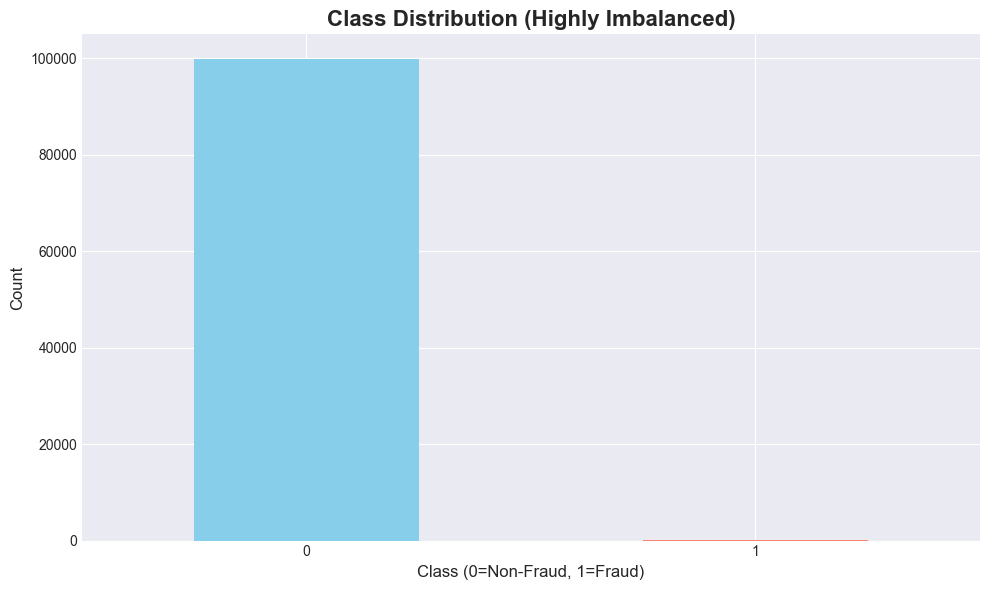

In [ ]:
# Class distribution
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

print("Fraud Distribution:")
print(f"Non-Fraud (0): {fraud_counts[0]:,} ({fraud_percentage[0]:.4f}%)")
print(f"Fraud (1): {fraud_counts[1]:,} ({fraud_percentage[1]:.4f}%)")

# Visualize
plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Highly Imbalanced)', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/figures/class_distribution.png', dpi=300)
plt.show()
